# Further information

## How to solve a system of differential equations?

Given a system of differential equations like the following:

$$
    \begin{cases}
        \frac{dx}{dt} =& x - y\\
        \frac{dy}{dt} =& x + y\\
        y(0) =& 250\\
        y(1) =& 300
    \end{cases}
$$

We can solve it using `sym.dsolve` but instead of passing a single differential
equation, we pass an iterable of multiple equations:

In [1]:
import sympy as sym


y = sym.Function("y")
x = sym.Function("x")

t = sym.Symbol("t")
alpha = sym.Symbol("alpha")
beta = sym.Symbol("beta")

system_of_equations = (
    sym.Eq(sym.diff(y(t), t), alpha * x(t)),
    sym.Eq(sym.diff(x(t), t), beta * y(t)),
)
conditions = {y(0): 250, y(1): 300}

y_solution, x_solution = sym.dsolve(system_of_equations, ics=conditions, set=True)
x_solution

Eq(x(t), -50*beta*(5*exp(sqrt(alpha*beta)) - 6)*exp(sqrt(alpha*beta))*exp(-t*sqrt(alpha*beta))/(sqrt(alpha*beta)*(exp(2*sqrt(alpha*beta)) - 1)) + 50*beta*(6*exp(sqrt(alpha*beta)) - 5)*exp(t*sqrt(alpha*beta))/(sqrt(alpha*beta)*(exp(2*sqrt(alpha*beta)) - 1)))

In [2]:
y_solution

Eq(y(t), 50*(5*exp(sqrt(alpha*beta)) - 6)*exp(sqrt(alpha*beta))*exp(-t*sqrt(alpha*beta))/(exp(2*sqrt(alpha*beta)) - 1) + 50*(6*exp(sqrt(alpha*beta)) - 5)*exp(t*sqrt(alpha*beta))/(exp(2*sqrt(alpha*beta)) - 1))

## How to solve differential equations numerically

Some differential equations do not have a closed form solution in terms of
elementary functions. For example, the [Airy or Stokes equation](https://en.m.wikipedia.org/wiki/Airy_function):

$$
\frac{d^2y}{dx^2} = xy
$$

Attempting to solve this with Sympy gives:

In [3]:
import sympy as sym

y = sym.Function("y")
x = sym.Symbol("x")

equation = sym.Eq(sym.diff(y(x), x, 2), x * y(x))
sym.dsolve(equation, y(x))

Eq(y(x), C1*airyai(x) + C2*airybi(x))

which is a linear combination of $A_i$ and $B_i$ which are special functions
called the Airy functions of the first and second kind.

Using `scipy.integrate` it is possible to solve this differential equation numerically.

First, we will define a new variable $u=\frac{dy}{dx}$ so that the second order
differential equation can be expressed as a system of single order differential
equations:

$$
    \begin{cases}
        \frac{du}{dx}=&xy\\
        \frac{dy}{dx}=&u
    \end{cases}
$$

We now define a python function to that returns the right hand side of that
system of equations:

In [4]:
def diff(state, x):
    """
    Returns the value of the derivates for a given set of state values (u, y).
    """
    u, y = state
    return x * y, u

We can pass this to `scipy.integrate.odeint` which is a tool that carries out
numerical integration of differential equations. Note, that it is incapable of
dealing with symbolic variables, thus an initial numeric value of $(u, y)$ is
required.

In [5]:
import numpy as np
import scipy.integrate

condition = (.1, -.5)

xs = np.linspace(0, 1, 50)
states = scipy.integrate.odeint(diff, y0=condition, t=xs)


```{note}
We make use of
{ref}`how-to-create-a-given-number-of-values-between-two-bounds` to create a set
of `x` values over which to carry out the numerical integration.
```

This returns an array of values of `states` corresponding to $(u, y)$.

In [6]:
states

array([[ 0.1       , -0.5       ],
       [ 0.09989617, -0.49795991],
       [ 0.09958578, -0.49592403],
       [ 0.09907053, -0.49389658],
       [ 0.09835211, -0.49188172],
       [ 0.09743216, -0.48988358],
       [ 0.09631231, -0.48790626],
       [ 0.09499416, -0.48595381],
       [ 0.09347927, -0.48403028],
       [ 0.09176914, -0.48213966],
       [ 0.08986521, -0.48028592],
       [ 0.08776887, -0.47847301],
       [ 0.08548146, -0.47670482],
       [ 0.08300422, -0.47498526],
       [ 0.08033831, -0.47331818],
       [ 0.07748482, -0.47170742],
       [ 0.07444474, -0.47015681],
       [ 0.07121895, -0.46867013],
       [ 0.06780825, -0.46725117],
       [ 0.06421331, -0.4659037 ],
       [ 0.06043468, -0.46463147],
       [ 0.0564728 , -0.46343822],
       [ 0.05232797, -0.4623277 ],
       [ 0.04800035, -0.46130363],
       [ 0.04348998, -0.46036975],
       [ 0.03879673, -0.45952978],
       [ 0.03392031, -0.45878746],
       [ 0.0288603 , -0.45814653],
       [ 0.02361608,

A plot of the above with a comparison to the exact expected values (obtained
using the Airy functions of the first and second kind):

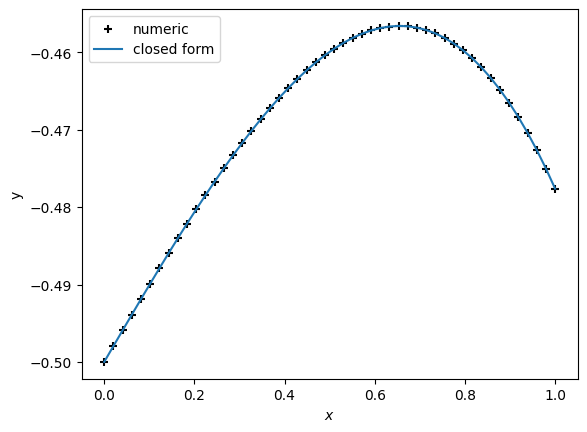

In [7]:
import matplotlib.pyplot as plt

x = sym.Symbol("x")
y = sym.Function("y")

equation = sym.Eq(lhs=sym.diff(y(x), x, 2), rhs=x * y(x) )
solution = sym.dsolve(equation, y(x), ics={y(0): condition[1], y(x).diff(x).subs(x, 0): condition[0]})

states = scipy.integrate.odeint(diff, y0=condition, t=xs)
plt.figure()
plt.scatter(xs, states.T[1], label="numeric", marker="+", color="black")
plt.plot(xs, [solution.rhs.subs({x: value}) for value in xs], label="closed form")
plt.xlabel("$x$")
plt.ylabel("y")
plt.legend();